In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def random_solution(data):
    path = []
    value = 0
    limit = len(data) // 2
    i = random.randint(0, len(data)-1)
    cur, cost = data[i][:-1], data[i][-1]
    while(len(data) > limit):
        path.append(np.append(cur, cost))
        data = np.delete(data, i, 0)
        i = random.randint(0, len(data)-1)
        value += round(np.linalg.norm(cur-data[i][:-1])) + data[i][-1]
        cur, cost = data[i][:-1], data[i][-1]
        
    value += round(np.linalg.norm(path[0][:-1]-cur)) + path[0][-1]
    path.append(path[0])
    return value, path

In [3]:
def nearest_neighbor(data):
    path = []
    value = 0
    limit = len(data) // 2
    i = random.randint(0, len(data)-1)
    cur, cost = data[i][:-1], data[i][-1]
    while(len(data) > limit):
        path.append(np.append(cur, cost))
        data = np.delete(data, i, 0)
        costs = np.apply_along_axis(lambda node: round(np.linalg.norm(cur-node[:-1])) + node[-1], 1, data)
        i = np.argmin(costs)
        value += costs[i]
        cur, cost = data[i][:-1], data[i][-1]
        
    value += round(np.linalg.norm(path[0][:-1]-cur)) + path[0][-1]
    path.append(path[0])
    return value, path

In [4]:
def greedy_cycle(data):
    #TBD
    pass

In [5]:
def evaluate(func, data, n=200):
    total, worst_value, best_value, best_solution = 0, 0, float('inf'), None
    for _ in range(n):
        value, solution = func(data)
        total += value
        if value < best_value:
            best_solution = solution
            best_value = value
        worst_value = max(worst_value, value)
    return total / n, worst_value, best_value, np.array(best_solution).T

In [6]:
def summarize(func, data, title):
    average, worst_value, best_value, (x, y, z) = evaluate(func, data)
    print(f'{title}:')
    print(f'average score: {average}\tworst score: {worst_value}\tbest score: {best_value}')
    print('Best solution:')

    plt.figure(figsize=(15,10))
    plt.scatter(x, y, np.full(x.size, 100), z, cmap='gray_r')
    plt.clim(0, 2000)
    plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
    plt.plot(x, y, 'r')
    plt.xlim([-100, 4100])
    plt.ylim([-100, 2100])
    plt.title(title)
    plt.show()

In [7]:
data = np.loadtxt('TSPA.csv', dtype=int, delimiter=';')

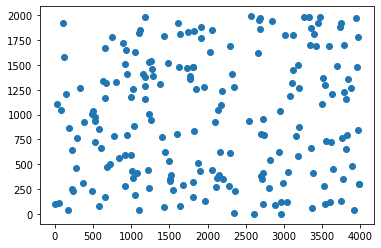

In [8]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Random solution:
average score: 266744.115	worst score: 289408	best score: 243591
Best solution:


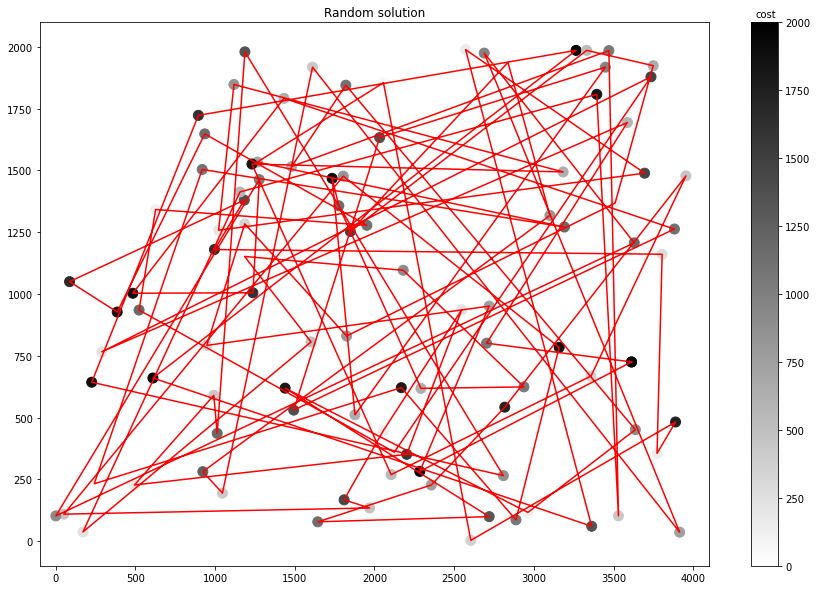

In [9]:
summarize(random_solution, data, 'Random solution')

Nearest neighbor:
average score: 88915.8	worst score: 96922	best score: 86155
Best solution:


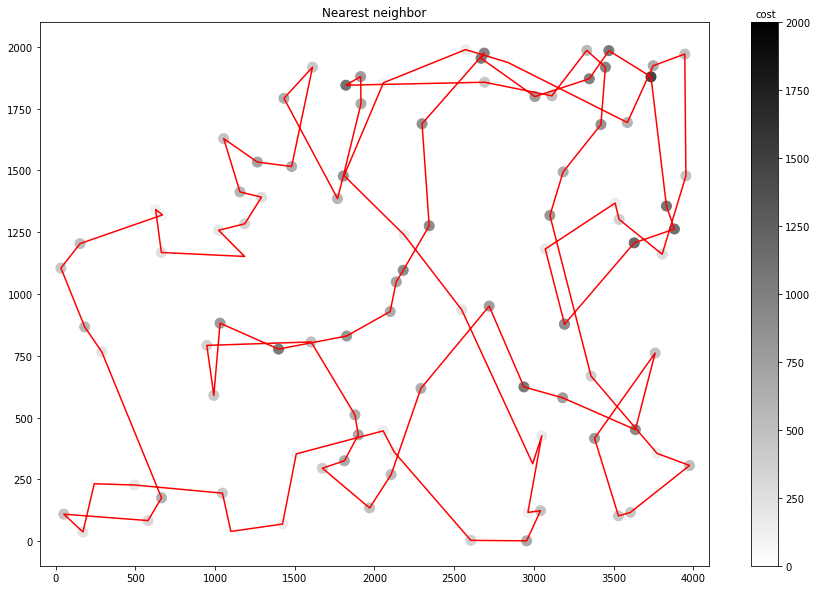

In [10]:
summarize(nearest_neighbor, data, 'Nearest neighbor')

In [11]:
# TBD:
# summarize(greedy_cycle, data, 'Greedy cycle')

In [12]:
data = np.loadtxt('TSPB.csv', dtype=int, delimiter=';')

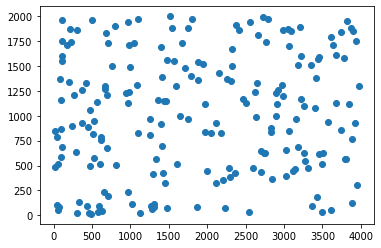

In [13]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Random solution:
average score: 269028.275	worst score: 292208	best score: 236462
Best solution:


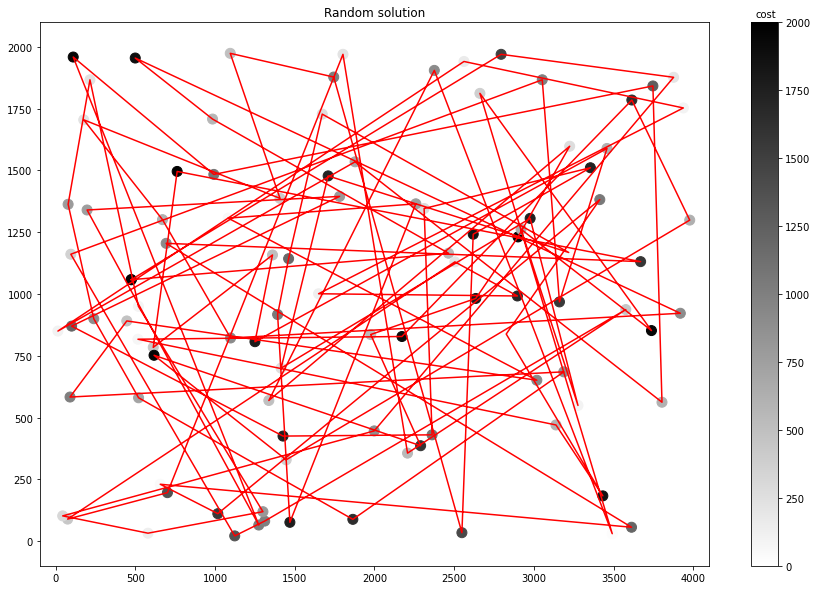

In [14]:
summarize(random_solution, data, 'Random solution')

Nearest neighbor:
average score: 80328.755	worst score: 82815	best score: 78548
Best solution:


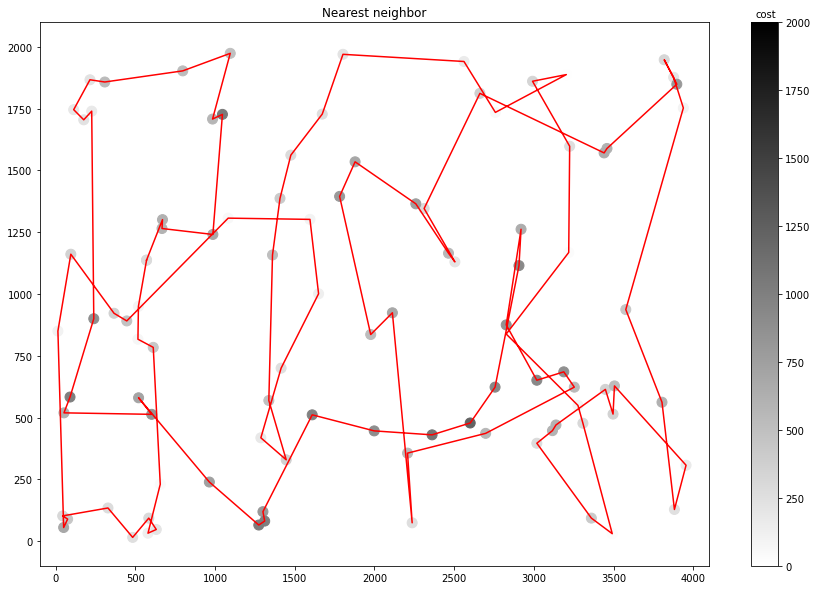

In [15]:
summarize(nearest_neighbor, data, 'Nearest neighbor')

In [16]:
# TBD:
# summarize(greedy_cycle, data, 'Greedy cycle')